In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/AirBNB.csv


> # **Introdiction**

Airbnb is an online platform that allows people to rent short term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for an accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

# **Data Dictionery**

* id:                         Property ID
* room_type:                  Type of Room in the property
* accommodates:               How many adults can this property accomodate
* bathrooms:                  Number of bathrooms in the property
* cancellation_policy:        Cancellation policy of the property
* cleaning_fee:               This denotes whether the property's cleaning fee is                                 included in the rent or not
* instant_bookable:           It indicates whether an instant booking facility is                                 available or not
* review_scores_rating:       The review rating score of the property
* bedrooms:                   Number of bedrooms in the property
* beds:                       Total number of beds in the property
* log_price:                  Log of the rental price of the property for a fixed                                 period

# **Import Libraries**

In [2]:
# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing and data transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


**Loading the dataset**

In [3]:
df = pd.read_csv("/kaggle/input/AirBNB.csv", low_memory = False)



In [4]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


Checking Duplicates

In [5]:
df.duplicated().sum()

0

# **Splitting the Dataset**

In [6]:
from sklearn.model_selection import train_test_split

# Separate the feature and the target variable
X = df.drop('log_price', axis=1) # Features (all columns except 'SalePrice')
y = df['log_price']              # Target Variable

# split the dataset into traing and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

            
# Verify the dimensions of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (59288, 10)
X_test shape: (14823, 10)
y_train shape: (59288,)
y_test shape: (14823,)


# **Column Info**

In [7]:
df_description = df.describe(include='all')
df_description

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,NaN,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,NaN,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,NaN,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,1.126662e+07,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


# **Outliers**

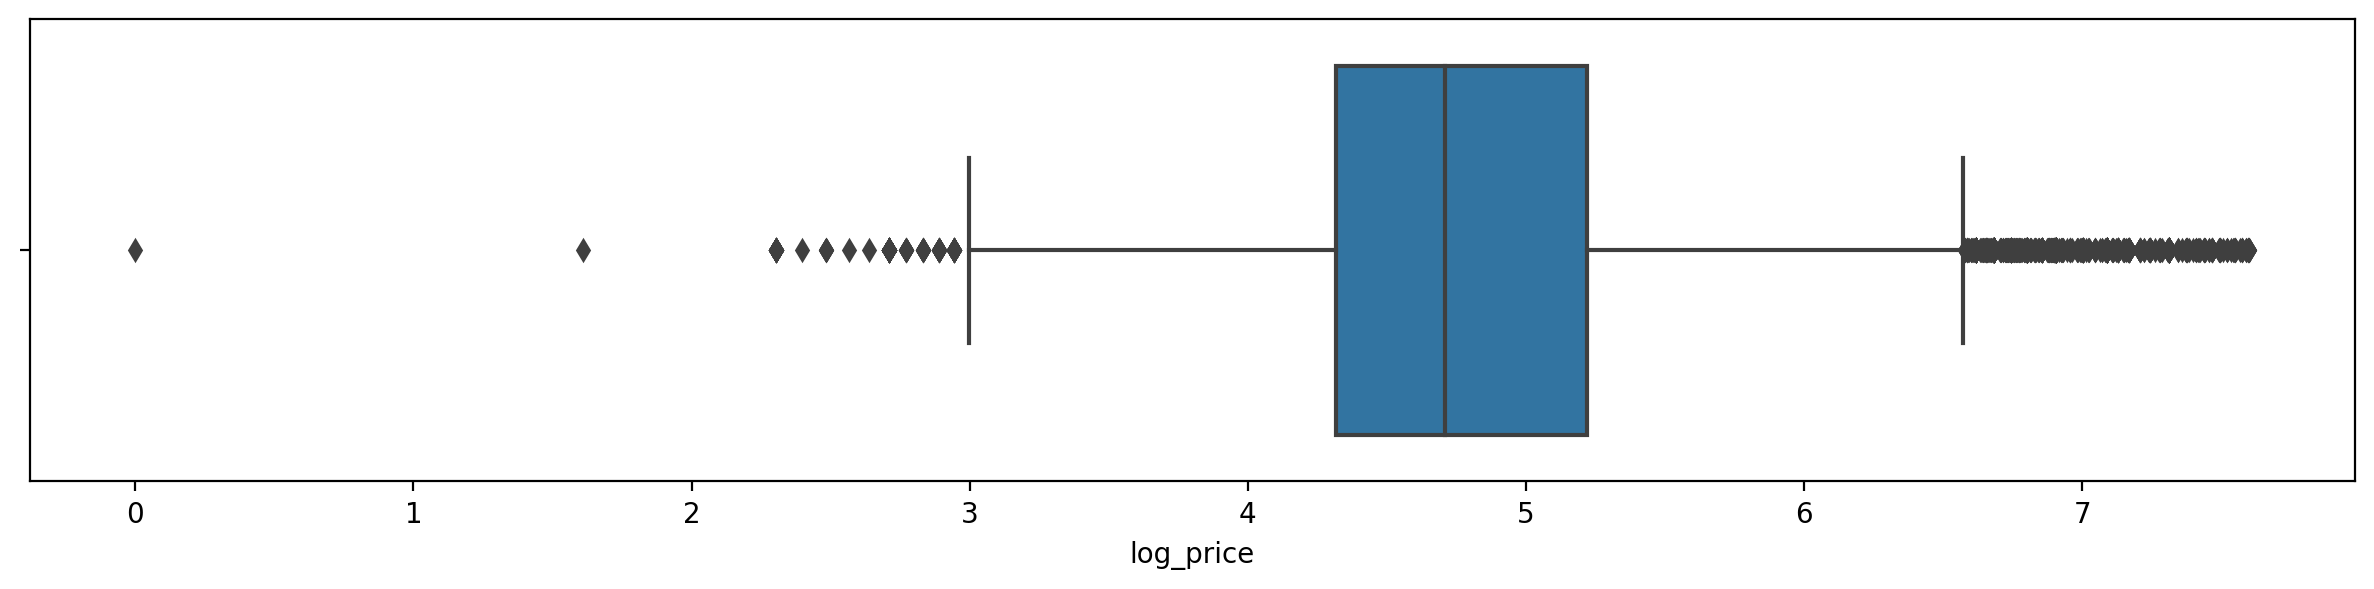

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#set up the figure size and DPI
plt.figure(figsize=(15, 3), dpi=200)

# Create the boxplot
sns.boxplot(x=df['log_price'])

# Set the plot orientation
plt.xlabel('log_price')

plt.show()

In [9]:
X_train.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
12048,760827,Entire home/apt,4.0,1.5,flexible,False,f,97.0,2.0,3.0
48255,3257345,Entire home/apt,2.0,1.0,strict,True,t,87.0,1.0,1.0
39959,13355012,Entire home/apt,4.0,1.0,strict,True,t,80.0,0.0,2.0
14926,4565981,Private room,2.0,1.0,flexible,True,f,NaN,1.0,1.0
776,6940108,Entire home/apt,3.0,1.0,moderate,True,f,99.0,1.0,1.0


In [10]:
X_train.shape

(59288, 10)

In [11]:
X_train.dtypes.value_counts()

float64    5
object     4
int64      1
Name: count, dtype: int64

In [12]:
X_train.isnull().sum()

id                          0
room_type                   4
accommodates                2
bathrooms                 162
cancellation_policy         5
cleaning_fee                3
instant_bookable            0
review_scores_rating    13395
bedrooms                   79
beds                      104
dtype: int64

In [13]:
#df.isnull().sum()/len(df)*100 ( Use either any one code )

missing_values = X_train.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(X_train)) * 100

print(missing_percentage)

room_type                0.006747
accommodates             0.003373
bathrooms                0.273242
cancellation_policy      0.008433
cleaning_fee             0.005060
review_scores_rating    22.593105
bedrooms                 0.133248
beds                     0.175415
dtype: float64


In [14]:
columns_to_fill = missing_percentage[missing_percentage < 30].index
columns_to_fill

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [15]:
for column in columns_to_fill:
    if X_train[column].dtype == "float64" or X_train[column].dtype == "int64":
        X_train[column] = X_train[column].fillna(X_train[column].mean())
    else:
        X_train[column] = X_train[column].fillna(X_train[column].mode()[0])

# Display the DataFrame
X_train

/tmp/ipykernel_18/3455959922.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[column] = X_train[column].fillna(X_train[column].mode()[0])


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
12048,760827,Entire home/apt,4.0,1.5,flexible,False,f,97.000000,2.0,3.0
48255,3257345,Entire home/apt,2.0,1.0,strict,True,t,87.000000,1.0,1.0
39959,13355012,Entire home/apt,4.0,1.0,strict,True,t,80.000000,0.0,2.0
14926,4565981,Private room,2.0,1.0,flexible,True,f,94.076526,1.0,1.0
776,6940108,Entire home/apt,3.0,1.0,moderate,True,f,99.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
37194,15101498,Private room,2.0,1.5,strict,True,f,100.000000,1.0,1.0
6265,298258,Private room,1.0,1.0,flexible,True,f,90.000000,1.0,1.0
54886,4917508,Entire home/apt,5.0,2.0,strict,True,f,91.000000,2.0,2.0
860,16645828,Private room,2.0,1.0,strict,True,f,94.076526,1.0,1.0


In [16]:
X_train.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

In [17]:
X_train.isnull().sum().sum()

0

In [18]:
X_train.id.nunique()

59288

In [19]:
X_train.drop(columns=['id'], inplace=True)

In [20]:
num_data = X_train.select_dtypes(include=np.number).columns.tolist()

In [21]:
cat_data = X_train.select_dtypes(exclude=np.number).columns.tolist()

In [22]:
cat_data_df = df[cat_data]
cat_data_df

,room_type,cancellation_policy,cleaning_fee,instant_bookable
0,Entire home/apt,strict,True,f
1,Entire home/apt,strict,True,t
2,Entire home/apt,moderate,True,t
3,Entire home/apt,flexible,True,f
4,Entire home/apt,moderate,True,t
...,...,...,...,...
74106,Private room,flexible,False,f
74107,Entire home/apt,moderate,True,f
74108,Entire home/apt,moderate,True,t
74109,Entire home/apt,strict,True,t


In [23]:
cat_data_df.isnull().sum()

room_type              5
cancellation_policy    8
cleaning_fee           4
instant_bookable       0
dtype: int64

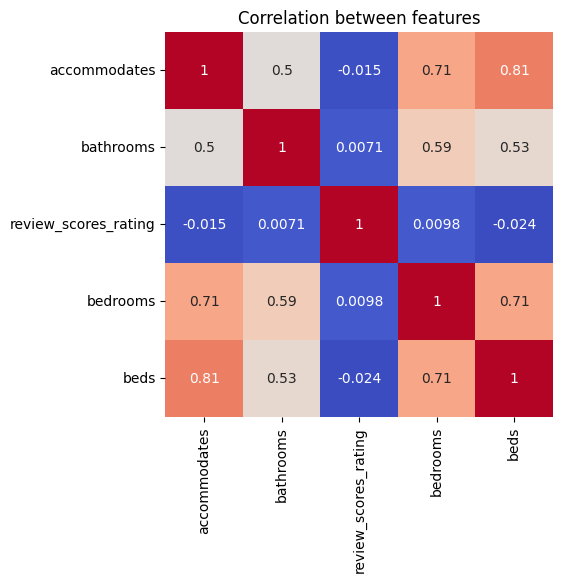

In [24]:
corr = X_train[num_data].corr()
plt.subplots(1,1, figsize=(5,5))
sns.heatmap(data=corr, cmap ='coolwarm', annot = corr, cbar=None)
plt.title('Correlation between features')
plt.show()

* When you calculate the correlation matrix, it is symmetric, meaning the correlation of A with B is the same as the       correlation    of B with A. To avoid processing the same pair twice and to ignore the diagonal (which represents the  correlation of each feature with itself), you can use only the upper triangle of the matrix. 
 
* np.ones(corr.shape): Creates an array of ones with the same shape as the correlation matrix.

* np.triu(..., k=1): Produces a mask for the upper triangle of the matrix, excluding the diagonal (since k=1). If you wanted  to include the diagonal, you would use k=0.
 
* corr.where(...): Applies this mask to the correlation matrix, setting all elements not in the upper triangle to NaN.

In [25]:
# Identify pairs of highly correlated features
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))



In [26]:
# Find columns with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.6)]

In [27]:
# Drop the columns with high correlation
X_train_reduced = X_train.drop(columns=to_drop)

In [28]:
# Recalculate the correlation matrix for the reduced DataFrame
num_data_reduced = X_train_reduced.select_dtypes(include=['float64', 'int64']).columns

In [29]:
# Recalculate the correlation matrix for the reduced DataFrame
corr_reduced = X_train_reduced[num_data_reduced].corr()

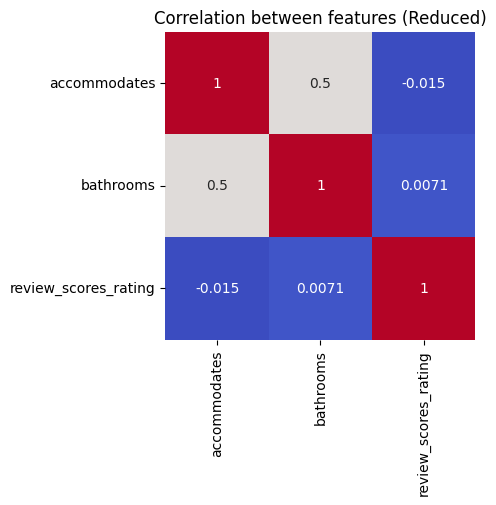

In [30]:
plt.figure(figsize=(4, 4))
sns.heatmap(data=corr_reduced, cmap='coolwarm', annot=True, cbar=None)
plt.title('Correlation between features (Reduced)')
plt.show()

# **Check Outliers and Distributions**

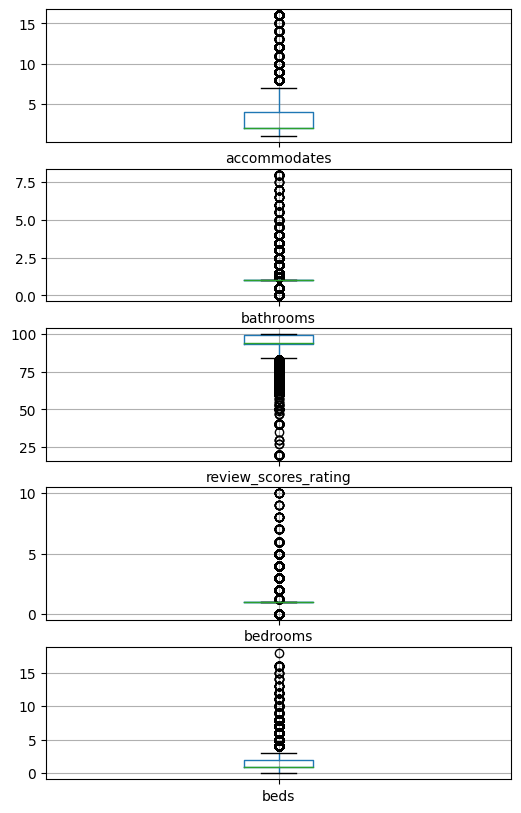

In [31]:
fig, ax = plt.subplots(len(num_data), 1, figsize=(6, 10))
for axs, feature in zip(ax, num_data):
    X_train[[feature]].boxplot(ax=axs)

# Target Exploration

In [32]:
y_train.value_counts()

log_price
5.010635    2193
4.605170    2137
4.317488    1637
5.298317    1572
3.912023    1519
            ... 
7.569412       1
6.639876       1
6.510258       1
6.682109       1
6.831954       1
Name: count, Length: 722, dtype: int64

In [33]:
X = df.drop('log_price', axis=1)
y = df['log_price']

# **Regression Models**

In [34]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                        OneHotEncoder(handle_unknown='ignore'))
preprocessor = ColumnTransformer([('num_pipe',num_pipe,num_data),('cat_pipe',cat_pipe, cat_data)])
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['accommodates', 'bathrooms',
                                  'review_scores_rating', 'bedrooms', 'beds']),
                                ('cat_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'cancellation_policy',
                                  'cleaning_fee', 'instant_bookable'])])

In [35]:
def prediction(model):
    pipeline = Pipeline([('preprocessor', preprocessor),('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return f"{model}'s RMSE is {np.sqrt(mean_squared_error(y_test, y_pred))}, MAE is {mean_absolute_error(y_test, y_pred)}, R2 is {r2_score(y_test, y_pred)}"

In [36]:
prediction(LinearRegression())

"LinearRegression()'s RMSE is 0.4970394043387104, MAE is 0.37727275473313426, R2 is 0.5191050905677888"

# **DecisionTree model**

In [37]:
#prediction(DesicionTreeRegressor(random_state=42, max_depth=2))
prediction(DecisionTreeRegressor(random_state=42))

"DecisionTreeRegressor(random_state=42)'s RMSE is 0.5412506690034034, MAE is 0.4059885324143644, R2 is 0.4297498188964405"

# **RandomForest model**

In [38]:
prediction(RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1))

"RandomForestRegressor(n_jobs=-1, random_state=42)'s RMSE is 0.5009790155287065, MAE is 0.38083562792149334, R2 is 0.511451584007806"

# **GradientBoosting**

In [39]:
prediction(GradientBoostingRegressor(random_state=42))

"GradientBoostingRegressor(random_state=42)'s RMSE is 0.4788613258719025, MAE is 0.364718523262775, R2 is 0.5536371242826448"

# **RidgeCV**

In [40]:
prediction(RidgeCV())

"RidgeCV()'s RMSE is 0.4970096486325709, MAE is 0.3772205046172483, R2 is 0.5191626672474751"

# **ElasticNetCV**

In [41]:
prediction(ElasticNetCV())

"ElasticNetCV()'s RMSE is 0.49752749963949416, MAE is 0.37728684475889623, R2 is 0.5181601441800382"

# **LassoCV**

In [42]:
prediction(LassoCV())

"LassoCV()'s RMSE is 0.49725131856671445, MAE is 0.3771965942591081, R2 is 0.5186949412030342"

# Best by using GD

In [43]:
best_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)
prediction(best_model)

"GradientBoostingRegressor(max_depth=4, n_estimators=300, random_state=42)'s RMSE is 0.47730649010736387, MAE is 0.3638743811573634, R2 is 0.5565310486912178"

# Final Submission for log_price

In [44]:
model = LinearRegression()
pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression's RMSE is {rmse}, MAE is {mae}, R2 is {r2}")

Linear Regression's RMSE is 0.4970394043387104, MAE is 0.37727275473313426, R2 is 0.5191050905677888


In [45]:
predictions_df = pd.DataFrame({
    'id': id,
    'log_price': y_pred
})
predictions_df.to_csv('/kaggle/working/predicted_prices_submission.csv', index=True)

print("Done, results saved into /kaggle/working/predicted_prices_submission.csv")

Done, results saved into /kaggle/working/predicted_prices_submission.csv


In [46]:
predictions_df

,id,log_price
0,<built-in function id>,4.339600
1,<built-in function id>,5.123535
2,<built-in function id>,5.107422
3,<built-in function id>,4.902100
4,<built-in function id>,4.360352
...,...,...
14818,<built-in function id>,5.097656
14819,<built-in function id>,4.344971
14820,<built-in function id>,4.902344
14821,<built-in function id>,5.810791
